In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import matplotlib.pyplot as plt
import pandas as pd
import collections
import string
%matplotlib inline

from cipherbreak import *

c6a = open('6a.ciphertext').read()
c6b = open('6b.ciphertext').read()

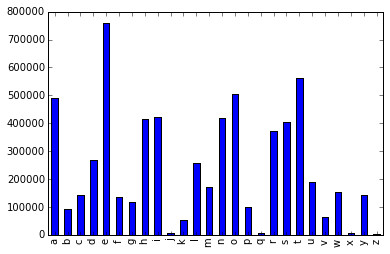

In [3]:
freqs = pd.Series(english_counts)
freqs.plot(kind='bar')

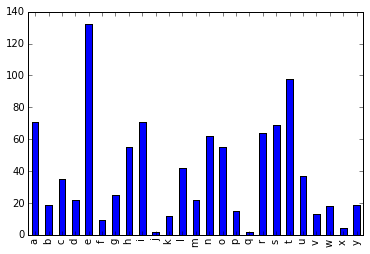

In [4]:
freqs_6a = pd.Series(collections.Counter([l.lower() for l in c6a if l in string.ascii_letters]))
freqs_6a.plot(kind='bar')

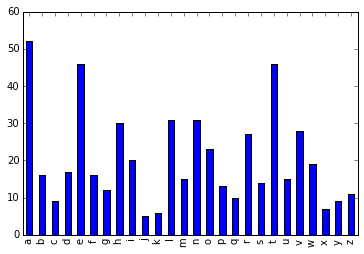

In [5]:
freqs_6b = pd.Series(collections.Counter([l.lower() for l in c6b if l in string.ascii_letters]))
freqs_6b.plot(kind='bar')

In [6]:
c6as = sanitise(c6a)
c6as

'mtaeglatcleptenopeautelebiiootatwnantateituiiagaeostgvetabdresiacqobwavgrhrsihssaekajbwwttdrsmeetnyafsegilegtkrreocuantteomsgstnsiaeluutrbaiaeteeserhxgtooarrbhpcklialhnaesvearhbepiydcesewtaxuyaerywoeinhteegeisieireaassrbitnhtuorooleewsttereoahyakhlsmsaeodslthsutigqimnidsgetpmwtrnnotfhvselkaumrndvcnrluceryhyeetlnigouncnanrhpnosbhshpslreclvrinfoehniaeennhcrbenrgunruesmlrehiutgteordroeaeoisoeusiknteeslohthdcrmisuteoteaeoshfaiaesemritrseisaigwyrmhrbtetncoenuhorcadeodlcrncomnctosihudtcinagesntisutigytmshthyalatlsnhilguimtlbfldyhrfrnetsaosteetaefhlgokhretcakuteihrlrtlsetshlcpeadhthyutaeennhryraeennihrnbhnsnehyutsdtoywmtiatalwhvbepetlxihuscrtadtikhnxmsaesnwluevgnrcpegvnhteruigeuealsdntikeaeomctwrybusiilephkyodhrsyhecaatrmrltrarretstuoetnuesiduaidoesisaeetbllerpntroisiatsiasesomihsieiaunsaitneelacrfnrnngvetteenslhvpepteonedtnaooutgsotancetimiiwoetiuihclsewtcniieotslfbeecohenpoelsdoctceeemiiirttmhbiuovecegaitjuaborcleentatruyinetsidlaeehitwencceohwvohoatwkteroarhcseer'

In [7]:
c6bs = sanitise(c6b)
c6bs

'hwssswxfewhhrfewpdrvttdhxbccleayphalnadhiehaoudrotwnrrvysabjlttbaytmelrkaidopthatlelrtwaamaneksvvzrvllatkcrjquicizgtoqcpnrrkttowandqehtqrvtbaydqealannohulanuzlwextlvjrvivhnohdqmgykaclmswrupdetfioftfelhzpxhaswftwprrsweiseohefpdrvttnvagdvswgoerbetnharvaeevtlltbmgaiatgelinmdawevhatterdhrznbnvoutnefoteveaehlaymhacglzeptvvdimworfisgtuzlwibeqohubtghamqornjnnrumqvjtxeltfovgawdaeevllgrtxibgtibevmpsaateoasevaeyqohameonncfuidoefafattemuimnflznbekofobrliaehhauihnnnwzaeevtlltpaalnanvtzlzuucptaelinanpaahewfthaosetaribnbnvhaevdhyytlmuxb'

In [8]:
key_a, score = railfence_break(c6as)
key_a, score

(3, -2314.997881051078)

In [9]:
' '.join(segment(railfence_decipher(c6as, key_a)))

'mark the last message told usa lot the scuttling equipment is designed to pump water in and out of the vessel like a submarine dive control but clearly they werent planning to turn a container ship into a sub this ship is a largescale version of something i have seen in the caribbean drug runners use a similar technique to get below radar coverage for inshore runs sinking the vessel so that the deck remains just below the wave tops the fda pirates seem more interested in staying away from shore but getting close enough to track and record electronic communications without detection i am guessing this scuttling system is what they call nautilus in their log but i am still baffled by the references to seahorse the next page of the log looks harder to crack but the cipher clerk tells me it is a hill cipher and that they must have been in a hurry or have been enciphering by hand since they just used a two by two matrix actually we have been pretty lax with our security and i think the nex

In [10]:
key_b, score = hill_break(c6bs)
key_b, score

(matrix([[0, 1],
         [1, 1]]), -666.1299098341699)

In [11]:
' '.join(segment(hill_decipher(key_b, c6bs)))

'phase six seahorse operated exactly as planned with good forward visibility at the trial depths the crew managed several tasks requiring concentration and dexterity and we plan to run a full test overnight on dummy cables dropped from the ship the software seems to be operating as designed but there are still bugs in the firmware that need ironing out before we deploy the collective is working full time to hunt them down and remove them though we are all getting tired mistakes are easy to make and could be fatal time is no longer on our side though and we are still planning to launch the final phase of the operation in three days timex'